In [2]:
import torch
import pandas as pd
import numpy as np



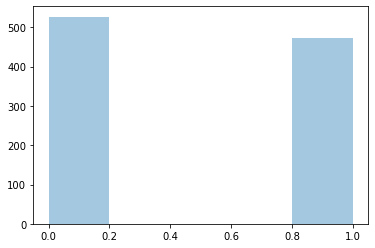

In [18]:
rv=torch.distributions.binomial.Binomial(total_count=1, probs=torch.Tensor([0.5]))
coin=rv.sample((1000,))
import seaborn as sns

sns.distplot(coin, kde=False)

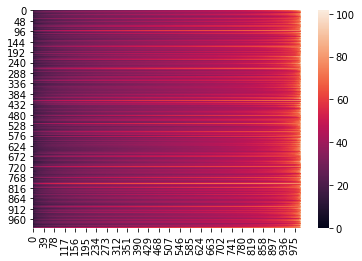

In [36]:
models=torch.load('mlruns/2/7974d344b21b426b9571b11170ec5afc/artifacts/FuNrefact_2020-08-07-13:28.pt')
dataset='concrete'
setup_ = get_setup(dataset)
setup=setup_.Setup(device) 
lat_dim=5
G=BigGenerator(lat_dim, setup.param_count, device).to(device)
G.load_state_dict(models[dataset])


params=G(1000).detach()
distances=torch.cdist(params,params).cpu()
distances=distances.sort(dim=1)[0]
sn.heatmap(distances)


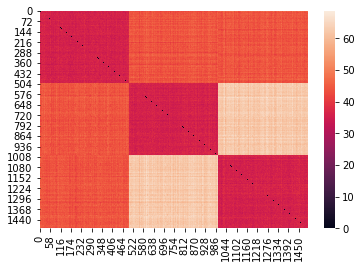

In [33]:

prior=torch.cat([torch.randn(500,650),torch.ones(500,650)+torch.randn(500,650),-torch.ones(500,650)+torch.randn(500,650)],dim=0)
#index=torch.randperm(prior.shape[0])
#prior=prior[index]
distances=torch.cdist(prior,prior).cpu()
sn.heatmap(distances)

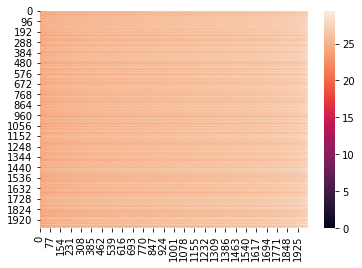

In [34]:
m=torch.load('Results/HMC_models.pt')
params=m[dataset][::5,:]
distances=torch.cdist(params,params).sort(dim=1)[0].cpu()
sn.heatmap(distances)

           0         1         2         3         4         5         6    \
0    -0.466787  3.840477 -0.886529  2.031321 -1.178525  1.995244 -2.595498   
1    10.278126 -4.136383 -2.796676  4.003349 -1.569030  2.374243 -2.164803   
2     8.534597 -1.441382 -0.970376  4.164988  0.493057  0.190525 -1.762105   
3    -1.661675  4.282258  1.491503  4.174909 -0.214731  0.293726 -2.788313   
4    -2.607828  2.853550  0.250355  4.081371  0.249196 -0.803213 -1.876935   
..         ...       ...       ...       ...       ...       ...       ...   
995  -2.505237  4.022913 -0.605180  5.135853  0.298785  0.523759 -1.525724   
996  -4.264261  6.488161  2.955962  3.621310 -0.307851  1.083616 -1.029822   
997  -5.122821  4.545057 -1.533731  2.945575  0.671064 -1.099119 -2.280946   
998  -2.674701  3.827568  1.167211  3.633766 -1.091215  1.018637 -0.435318   
999  -2.910336  4.888472  2.328953  5.661597 -0.639854  0.361023 -1.502192   

          7         8         9    ...       291       292     

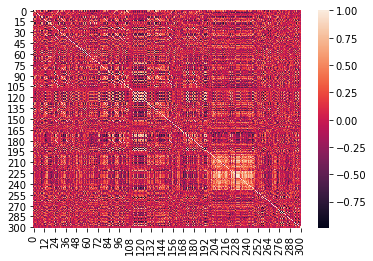

In [29]:
params=G(1000).detach().cpu().numpy()
params_=pd.DataFrame(data=params)
print(params_)

sn.heatmap(params_.corr())

(1000, 301)
          0         1         2         3         4         5         6    \
0    1.000000  0.057292  0.006655 -0.007450 -0.000094  0.043070  0.006192   
1    0.057292  1.000000  0.039794 -0.047353 -0.014741  0.063442 -0.054794   
2    0.006655  0.039794  1.000000  0.022176  0.015110 -0.006857 -0.036413   
3   -0.007450 -0.047353  0.022176  1.000000 -0.031904 -0.010166  0.012480   
4   -0.000094 -0.014741  0.015110 -0.031904  1.000000  0.078767 -0.006033   
..        ...       ...       ...       ...       ...       ...       ...   
296  0.084198 -0.027108  0.042193 -0.018830  0.046352 -0.004384 -0.001633   
297 -0.096846 -0.011714 -0.003746  0.035394 -0.017557 -0.056335  0.038690   
298 -0.000917  0.036211  0.047803 -0.029037 -0.007768 -0.049810 -0.014378   
299 -0.036205  0.004005  0.038309  0.075263  0.020585 -0.042201 -0.004520   
300  0.004034 -0.016582 -0.052432  0.018219 -0.037194  0.008752 -0.075830   

          7         8         9    ...       291       292     

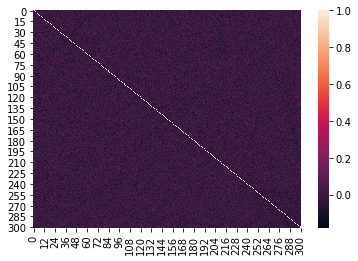

In [30]:
m=torch.load('Results/HMC_models.pt')
params=m[dataset][:1000,:].cpu().numpy()
print(params.shape)
params_=pd.DataFrame(params)
print(params_.corr())
#import seaborn as sn
sn.heatmap(params_.corr())

In [49]:
run_id='c1180fbf2ba44452830bade5888386f6'

d=torch.load('mlruns/1/'+run_id+'/artifacts/FuNrefact_2020-08-01-15:54_results.pt')
print(d)
for setup, metrics in d.items():
    for m in ['RMSE','LPP']:
        metrics[m]=(np.round(metrics[m][0],2),np.round(metrics[m][1],2))

{'boston': {'RMSE': (3.5666258335113525, 5.54773473739624), 'LPP': (-1.9247385737260998, 0.057821657025400174), 'PICP': 0.9457900524139404, 'MPIW': 40.22855758666992, 'time': 12.907583484891802}, 'concrete': {'RMSE': (9.821114540100098, 11.041147232055664), 'LPP': (-2.4353058727467483, 0.011363044334236827), 'PICP': 0.46781036257743835, 'MPIW': 25.46808433532715, 'time': 28.384959338232875}, 'energy': {'RMSE': (3.498241424560547, 4.939652919769287), 'LPP': (-1.33345680722283, 0.05728049772047737), 'PICP': 0.4589306712150574, 'MPIW': 18.310535430908203, 'time': 17.713587325066328}, 'powerplant': {'RMSE': (4.1367011070251465, 5.362141132354736), 'LPP': (-2.0539163473065045, 0.0051173268855476415), 'PICP': 0.11823674291372299, 'MPIW': 6.591818332672119, 'time': 152.05741617223248}, 'wine': {'RMSE': (0.6097584366798401, 0.7768952250480652), 'LPP': (-1.3066942175553196, 1.6841908321731631), 'PICP': 0.17664062976837158, 'MPIW': 0.5324358940124512, 'time': 30.673401075880975}, 'yacht': {'RMSE

In [50]:
p=pd.DataFrame(data=d)

p_h=p.T.to_html()
Html_file= open("Results/metrics.html","w")
Html_file.write(p_h)
Html_file.close()
p_h

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>RMSE</th>\n      <th>LPP</th>\n      <th>PICP</th>\n      <th>MPIW</th>\n      <th>time</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>boston</th>\n      <td>(3.57, 5.55)</td>\n      <td>(-1.92, 0.06)</td>\n      <td>0.94579</td>\n      <td>40.2286</td>\n      <td>12.9076</td>\n    </tr>\n    <tr>\n      <th>concrete</th>\n      <td>(9.82, 11.04)</td>\n      <td>(-2.44, 0.01)</td>\n      <td>0.46781</td>\n      <td>25.4681</td>\n      <td>28.385</td>\n    </tr>\n    <tr>\n      <th>energy</th>\n      <td>(3.5, 4.94)</td>\n      <td>(-1.33, 0.06)</td>\n      <td>0.458931</td>\n      <td>18.3105</td>\n      <td>17.7136</td>\n    </tr>\n    <tr>\n      <th>powerplant</th>\n      <td>(4.14, 5.36)</td>\n      <td>(-2.05, 0.01)</td>\n      <td>0.118237</td>\n      <td>6.59182</td>\n      <td>152.057</td>\n    </tr>\n    <tr>\n      <th>wine</th>\n      <td>(0.61, 0.7

In [51]:
with mlflow.start_run(run_id=run_id):
        mlflow.log_artifact('Results/metrics.html')

In [243]:
import timeit
nb_samples=500
nb_parameters=600
p_=10*torch.randn(nb_samples,nb_parameters) #[samples, weights]
p=p_.transpose(1,0)

In [244]:
start = timeit.default_timer()

sq=(p.unsqueeze(2)-p.unsqueeze(1))**2
print(sq.shape)
distances=torch.sum(sq,dim=0).sqrt()
print(distances.shape)

stop = timeit.default_timer()
stop - start

torch.Size([600, 500, 500])
torch.Size([500, 500])


0.18505204934626818

In [245]:
start = timeit.default_timer()

dist_=torch.cdist(p_,p_)
print(dist_.shape)
stop = timeit.default_timer()
stop - start


torch.Size([500, 500])


0.003838134929537773

In [246]:
start = timeit.default_timer()

m=torch.min(distances+1e10*torch.eye(nb_samples),0)[0]
stop = timeit.default_timer()
stop - start


0.0015008952468633652

In [255]:
start = timeit.default_timer()

m_=torch.topk(distances, k=2, dim=1, largest=False, sorted=True)[0][:,1]
print(m_)
stop = timeit.default_timer()
stop - start


tensor([316.6899, 320.3392, 318.0457, 325.2227, 318.1206, 316.5814, 315.8035,
        312.5765, 313.9168, 316.7126, 315.5839, 320.1932, 323.8061, 325.6447,
        315.1491, 318.6086, 321.0987, 315.9068, 319.1941, 314.1652, 324.2366,
        310.4366, 324.6532, 316.3404, 313.2560, 323.4695, 319.2479, 321.4025,
        317.6147, 314.3221, 321.2799, 326.2215, 323.9580, 318.9791, 318.5801,
        307.3992, 321.7574, 328.5800, 321.9518, 329.5587, 319.8871, 317.8326,
        322.4313, 322.4686, 314.9488, 318.6793, 322.0016, 310.7234, 324.2252,
        321.7186, 320.9820, 317.8032, 324.0124, 318.5652, 312.2142, 312.3969,
        324.6200, 318.6298, 319.2602, 333.7459, 321.0960, 310.5924, 322.6967,
        326.7883, 323.7032, 314.6963, 327.8730, 321.4918, 314.3194, 309.9282,
        318.7635, 311.7557, 320.0071, 323.3677, 323.0993, 309.9282, 314.5164,
        317.8156, 322.4601, 321.3641, 320.5059, 322.7955, 322.4774, 328.2820,
        320.9069, 314.3672, 323.0081, 317.3021, 323.0011, 323.80

0.00618381192907691

In [248]:
torch.allclose(m,m_)

True

In [225]:
dist_.shape

torch.Size([500, 500])

In [226]:
torch.allclose(dist_, distances)

False

In [227]:
(dist_ == distances).float().sum()/(500**2)

tensor(0.6820)

In [256]:
m=torch.load('Results/HMC_models.pt')
m.updat

{'boston': tensor([[ 1.0707,  0.0194,  1.5402,  ..., -0.1771, -0.1571,  0.4368],
         [ 1.2202,  0.5472,  0.5591,  ...,  0.3426,  0.0408, -0.9457],
         [ 0.2826,  0.0452,  0.1072,  ..., -0.5463, -0.4925,  0.1756],
         ...,
         [-0.8411,  0.5133,  0.1050,  ...,  0.1450, -0.1428,  0.1383],
         [-0.2858,  1.0512,  0.3249,  ...,  0.1467, -0.3191, -0.6689],
         [-0.4634,  0.3481, -0.6650,  ...,  0.3384, -0.1625, -0.3116]]),
 'concrete': tensor([[ 0.5101, -0.2090,  0.8742,  ..., -0.1072, -0.5271,  1.5673],
         [-0.6270, -1.7959,  0.5354,  ..., -0.1576,  0.2648, -0.1649],
         [-0.7740,  0.7892,  0.1034,  ...,  0.4605,  0.1581, -0.4068],
         ...,
         [ 0.1854, -0.3341,  0.3273,  ..., -0.3070, -0.1581, -0.4753],
         [-1.2938, -0.4524,  0.8273,  ..., -0.4050,  0.1399,  1.1319],
         [ 0.9632,  1.0613, -0.0800,  ...,  0.0164, -0.2277,  0.9416]]),
 'energy': tensor([[-0.2692,  1.1072,  0.7447,  ..., -0.3731, -0.5760,  0.4497],
         [-0.